In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#assigning the dataset to the variable df
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#dropping unnecessary column ex.Id
df.drop(columns=['Id'], inplace=True)

In [4]:
#statistical info
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#it's clear that there are no null values
#checking the unique values of target 
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

C:\Users\paulc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


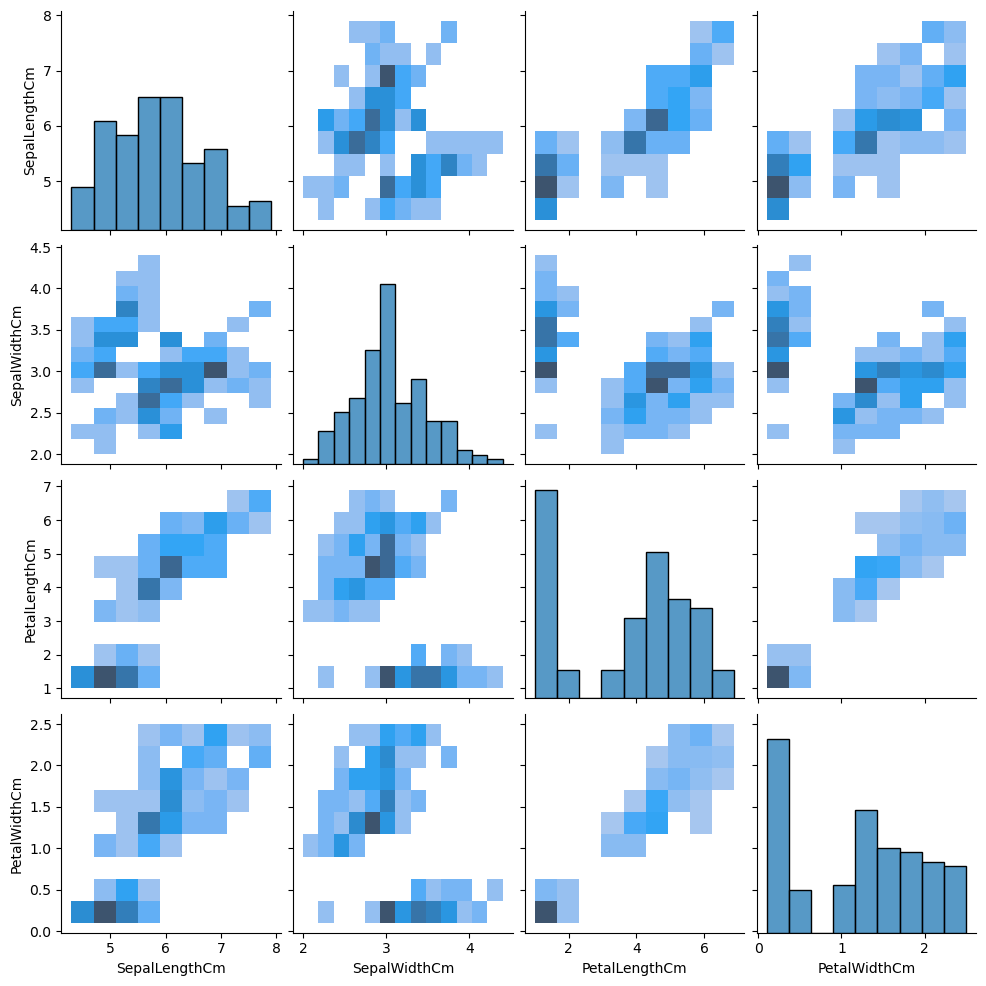

In [8]:
sns.pairplot(data=df,kind='hist')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

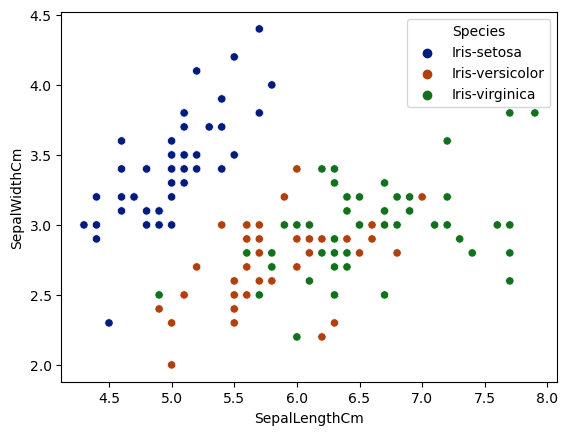

In [9]:
sns.scatterplot(df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='dark')


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

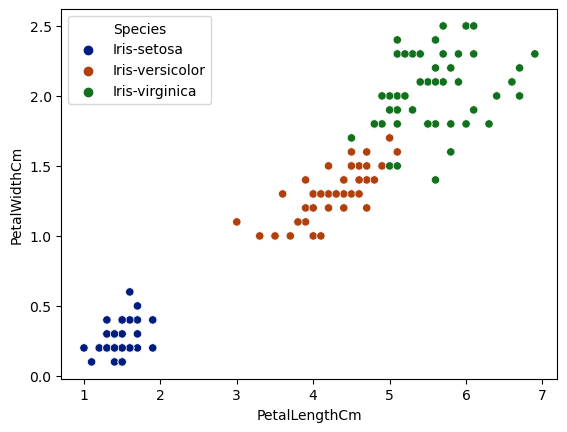

In [10]:
sns.scatterplot(df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='dark')

In [11]:
#encoding the str variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

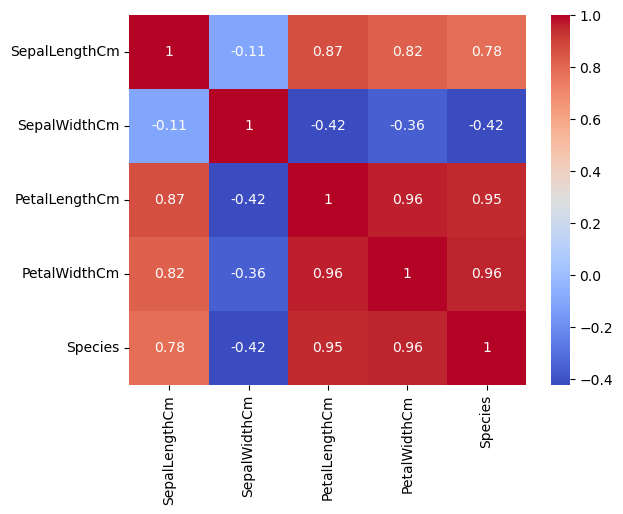

In [12]:
# Creating a correlation matrix to analyze the relationships between features in the dataset.
# This helps identify which features may be highly correlated with each other.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
# Split the dataset into training and testing sets.
X = df.drop(columns=['Species'])
y = df['Species']

In [14]:
# Defined a function to train the model, make predictions, and display various metrics.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    cv_score = cross_val_score(model, X, y, scoring='accuracy', cv = 5)
    cv_score = np.mean(cv_score)
    
    print('MODEL:',model)
    print('--------------------')
    print('Accuracy:', accuracy)
    print('CV Score:', cv_score)
    print('Confusion Matrix:\n', confusion_matrix(y_test, pred))
    print('Classification Report:\n', classification_report(y_test, pred))
    print('\n')

In [17]:
# Assigning different classification models to a variable for training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
models = [LogisticRegression(max_iter=200),
         KNeighborsClassifier(),
         DecisionTreeClassifier()]

In [18]:
# This loop iterates through each model, calling the train function to output the models performance metrics.
for model in models:
    train(model, X, y)

MODEL: LogisticRegression(max_iter=200)
--------------------
Accuracy: 0.9736842105263158
CV Score: 0.9733333333333334
Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



MODEL: KNeighborsClassifier()
--------------------
Accuracy: 1.0
CV Score: 0.9733333333333334
Confusion Matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy              